# Hypothesis testing solutions

## Exercise 1

### 1. State the hypotheses

- **Null hypothesis** ($H₀$): There is no difference in average weight loss between the two diets.
- **Alternative hypothesis** ($H₁$): There is a difference in average weight loss between the two diets.

### 2. Perform Student's t-test

In [2]:
import scipy.stats as stats

diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Student's t-test
t_value, p_value = stats.ttest_ind(diet_1, diet_2)

print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

t-value: -3.5383407969933938
p-value: 0.004083270191713912


### 3. Conclusion

By obtaining a p-value of less than a chosen significance level of 5% (0.05), we would reject the null hypothesis and conclude that there is a significant difference in weight loss between the two diets.

If the p-value had been greater, we would not reject the null hypothesis, suggesting that there was no significant difference.

## Exercise 2

### 1. State the hypotheses

- **Null hypothesis** ($H₀$): The corn yield averages of the three fertilizers are equal.
- **Alternative hypothesis** ($H₁$): At least one of the fertilizer corn yield averages is different.

### 2. Perform ANOVA test

In [5]:
import scipy.stats as stats

fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

# ANOVA test
f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print(f"f-value: {f_value}")
print(f"p-value: {p_value}")

f-value: 20.315789473684188
p-value: 0.00014047824793190475


### 3. Conclusion

By obtaining a value less than the established significance level (0.05), we reject the null hypothesis and conclude that there is a significant difference in the mean corn yield between at least two of the fertilizers.

### 4. Obtaining the best fertilizer

After performing the ANOVA test, it can be seen that there are significant differences between the groups. The next step is to identify which fertilizer is better, for which we will perform a post-hoc test. One of these tests is the Tukey test, which is based on the following:

1. If the first fertilizer is significantly different from the second fertilizer, but there is no significant difference between the first and the third, and no significant difference between the second and the third, we could conclude that the first fertilizer is the best or the worst, depending on the direction of the difference.
2. If all fertilizers are significantly different from each other, we would compare the means to determine which is the best.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


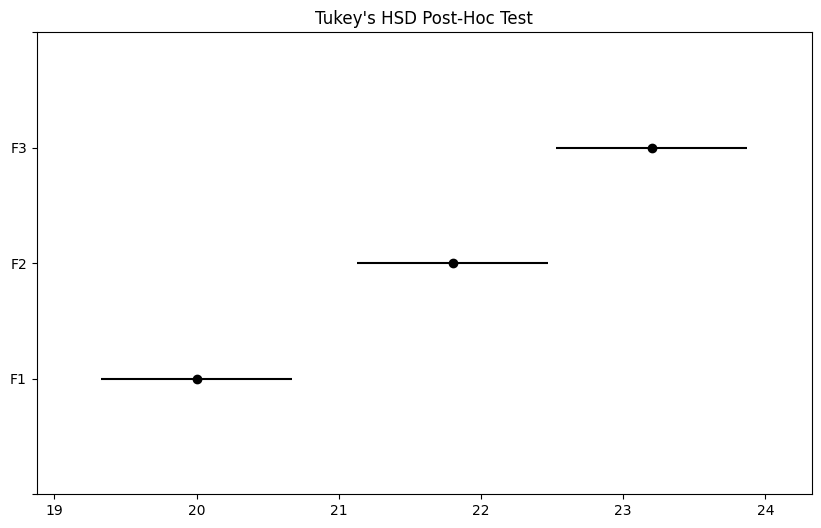

In [6]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = np.concatenate([fertilizer_1, fertilizer_2, fertilizer_3])
labels = ["F1"] * 5 + ["F2"] * 5 + ["F3"] * 5

# Tukey test
result = pairwise_tukeyhsd(data, labels, alpha = 0.05)
print(result)

Interpreting this table is very simple. Look at the `reject` column. If the value is `True` it means that there is a statistically significant difference between those two groups. If there is a significant difference, we need to look at the `meandiff` column to see how much the means of the two groups differ. If the value is positive, it means that `group2` has a higher mean than `group1`. If it is negative, the other way around.

From this information, we can determine which fertilizer is the best in terms of the metric we are measuring: the average yield (in kg) of corn. In this case, all fertilizers differ significantly from each other. The third fertilizer has the highest average, followed by the second and ending with the first. Therefore, **according to these results, the third fertilizer would be the best**.